# Logistic Regression : Factors Affecting the grades of students.

This data provides an insight of some Middle East countries and the factors that are affecting their overall grades.

In [1]:
import os


import pandas as pd
pd.set_option('display.max_column',None)


import warnings
warnings.filterwarnings('ignore')


import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import pearsonr


import sklearn
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_predict, train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE

get_ipython().run_line_magic('matplotlib', 'inline')
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
df = pd.read_csv(r'D:\Uddhav\DATA SCIENCE\Logistic Regression using Python\xAPI-Edu-Data.csv')
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


# Understanding The Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [4]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


On observation there are only 4 continious variable columns in the dataset.

<AxesSubplot:>

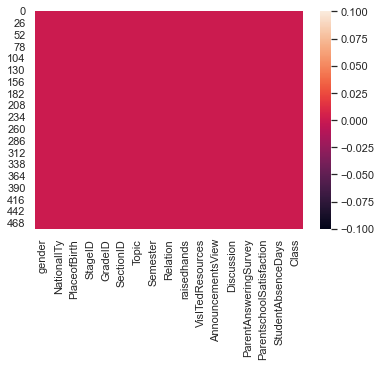

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.replace(' ', np.nan, inplace=True)

In [7]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [8]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

##### The dataset has no nulls.

## Q.1 Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?


### 1. Gender

<AxesSubplot:xlabel='gender', ylabel='count'>

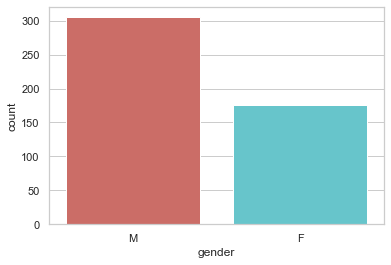

In [9]:
sns.countplot(df.gender, order=['M','F'], palette='hls')

We can observe that Male Students are high in 

### 2.StageID

<AxesSubplot:xlabel='StageID', ylabel='count'>

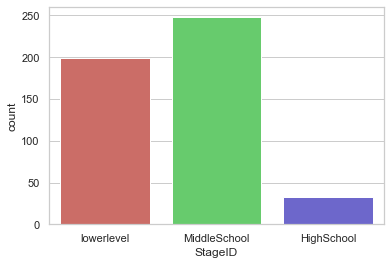

In [10]:
sns.countplot(df.StageID, palette='hls')

The count of students in High School is less as compared to Lowerlevel and Middle School.

### 3. Semester

<AxesSubplot:xlabel='Semester', ylabel='count'>

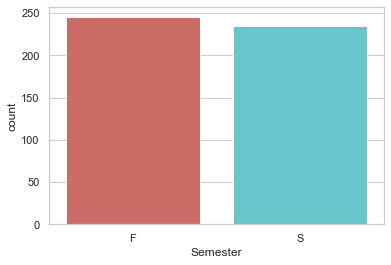

In [11]:
sns.countplot(df.Semester, order=['F','S'], palette='hls')

### 4. Relation

<AxesSubplot:xlabel='Relation', ylabel='count'>

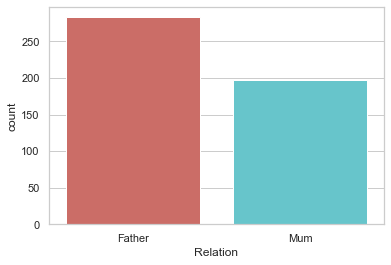

In [12]:
sns.countplot(df.Relation, palette='hls')

Count of students having a better relation with father is more as compared to mother.

### 5. ParentAnsweringSurvey

<AxesSubplot:xlabel='ParentAnsweringSurvey', ylabel='count'>

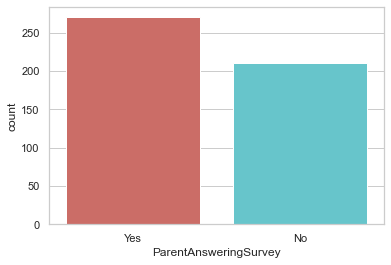

In [13]:
sns.countplot(df.ParentAnsweringSurvey, palette='hls')

### 6. ParentschoolSatisfaction	

<AxesSubplot:xlabel='ParentschoolSatisfaction', ylabel='count'>

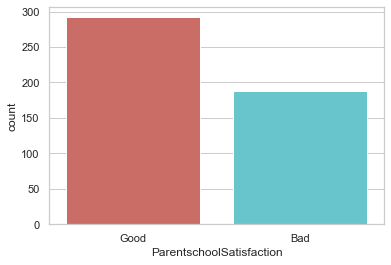

In [14]:
sns.countplot(df.ParentschoolSatisfaction, palette='hls')

Most of the parents are satisfied with the academics of the school.

### 7. StudentAbsenceDays

<AxesSubplot:xlabel='StudentAbsenceDays', ylabel='count'>

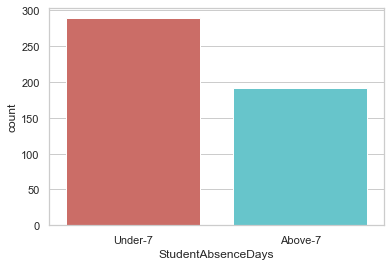

In [15]:
sns.countplot(df.StudentAbsenceDays, palette='hls')

The attendence of students seems to be good but there are few who have taken more than 7 days of leave.

### 8. Class

<AxesSubplot:xlabel='Class', ylabel='count'>

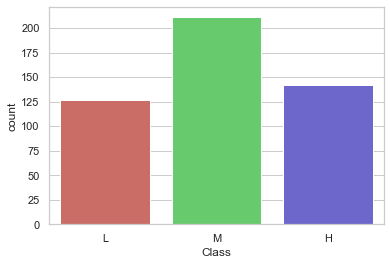

In [16]:
sns.countplot(df.Class, order=['L','M','H'],palette='hls')

### 9. Nationality

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

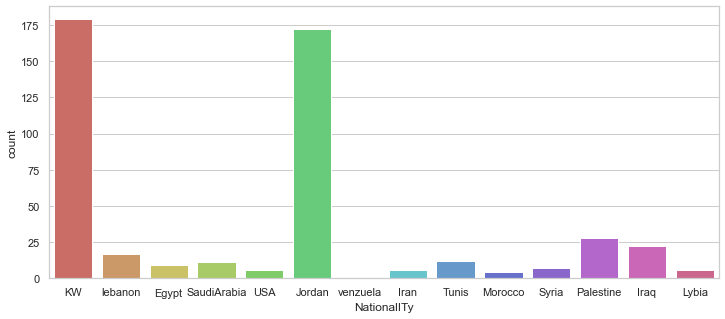

In [17]:
fig, ax = plt.subplots(figsize = (12,5)) 
sns.countplot(df.NationalITy, palette='hls')

### 10. Topic

<AxesSubplot:xlabel='Topic', ylabel='count'>

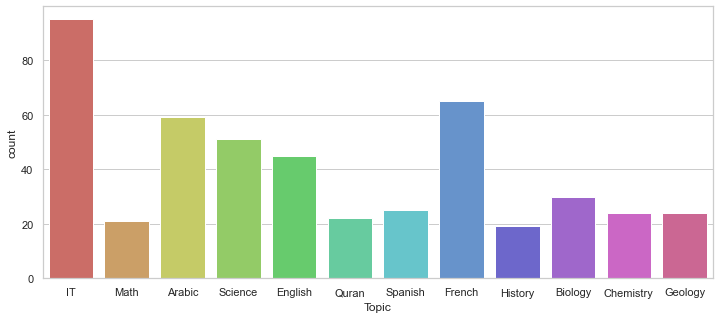

In [18]:
fig, ax = plt.subplots(figsize = (12,5))
sns.countplot(df.Topic, palette='hls')

#### 1. We can conclude that there are more Male students than Female.
#### 2. This can be justified as there are more Islamic states hence there is a Gender Disparity.
#### 3. There are very less count of students who carry out their education beyond Middle School.
#### 4. Jordan and Kuwait are the 2 nations with higgest number of students even compared to USA.
#### 5. Students opt for IT more than any other subject.
#### 6. Despite being a majority of Islamic Nations students tend to learn French more than Arabic.
#### 7. There are less students that have been absent for more than 7 days.

## Q.2 Look at some categorical features in relation to each other, to see what insights could be possibly read?

### Gender & Class

<AxesSubplot:xlabel='gender', ylabel='count'>

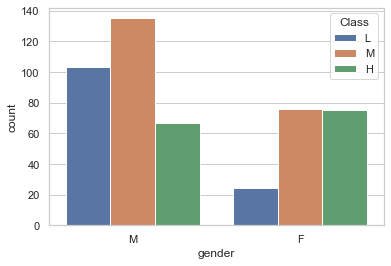

In [19]:
sns.countplot(x='gender', hue='Class',data=df,order=['M','F'], hue_order=['L','M','H'])

Female students are performing better than male as there are very low count of female with Low grade and comparetively High grade counts are more.

### Gender & StageID

<AxesSubplot:xlabel='gender', ylabel='count'>

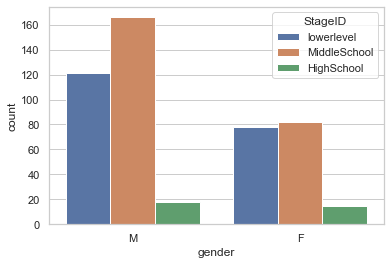

In [20]:
sns.countplot(x='gender', hue='StageID', data=df, order=['M','F'])

### Gender & Semester

<AxesSubplot:xlabel='gender', ylabel='count'>

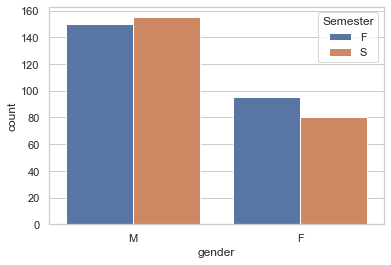

In [21]:
sns.countplot(x='gender', hue='Semester', data=df, order=['M','F'])

### Gender & Nationality

<AxesSubplot:xlabel='gender', ylabel='count'>

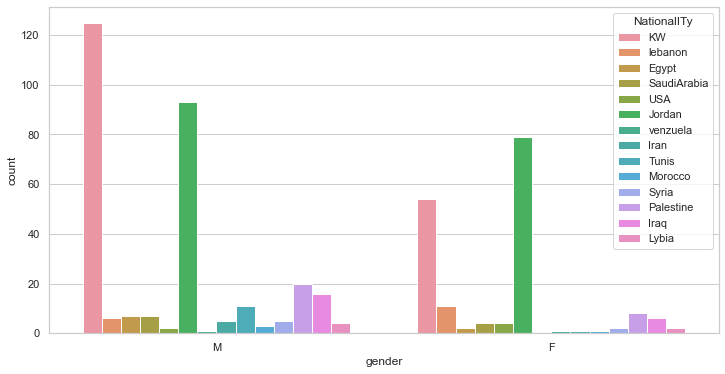

In [22]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(x='gender', hue='NationalITy', data=df, order=['M','F'])

There is a clear observation of Gender Disparity in these countries related to education.

### Gender & Topic

<AxesSubplot:xlabel='gender', ylabel='count'>

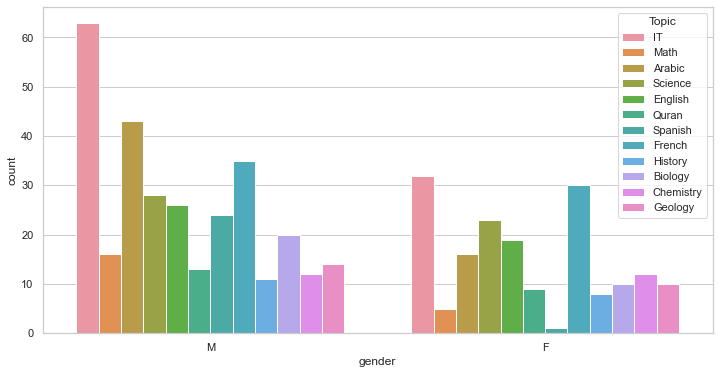

In [23]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(x='gender', hue='Topic', data=df, order=['M','F'])

Looking at the value counts there is no much difference as the Ratio of Male:Female has a huge difference but as compared to male female has opted less to learn Spanish.

### Gender & Relation

<AxesSubplot:xlabel='gender', ylabel='count'>

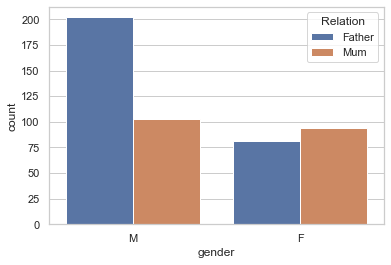

In [24]:
sns.countplot(x='gender', hue='Relation', data=df, order=['M','F'])

Female students have more relation with their Mother as compared to Father.

### Gender & Parents Answering Survey

<AxesSubplot:xlabel='gender', ylabel='count'>

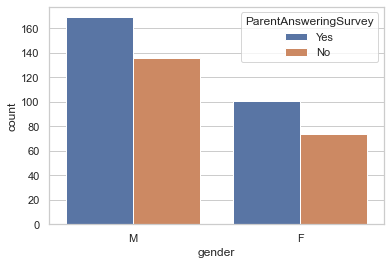

In [25]:
sns.countplot(x='gender', hue='ParentAnsweringSurvey', data=df, order=['M','F'])

### Gender & ParentschoolSatisfaction

<AxesSubplot:xlabel='gender', ylabel='count'>

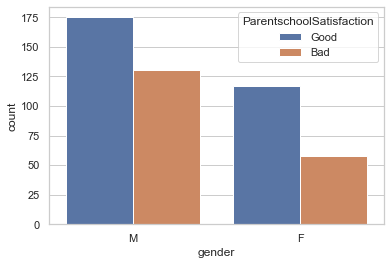

In [26]:
sns.countplot(x='gender', hue='ParentschoolSatisfaction', data=df, order=['M','F'])

### Gender & Student Absence Days

<AxesSubplot:xlabel='gender', ylabel='count'>

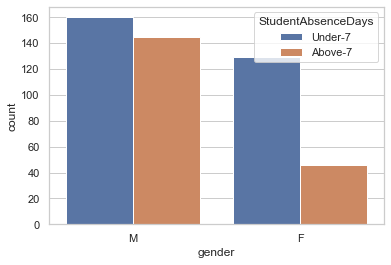

In [27]:
sns.countplot(x='gender', hue='StudentAbsenceDays', data=df, order=['M','F'])

#### 1. Female Students have performed better in academics than male students, even the count of female students in High class is higher than Male.
#### 2. The count of male students is much higher than females in respect to thier nationality except Kuwait & Jordan.
#### 3. Female has attended more classes as compared to Male.
#### 4. Much mush difference in Topic selected,
#### 5. Mothers tends to support Female students more than Father.

## Q.3 Visualize categorical variables with numerical variables and give conclusions?

### Visited Resources

<AxesSubplot:xlabel='Class', ylabel='VisITedResources'>

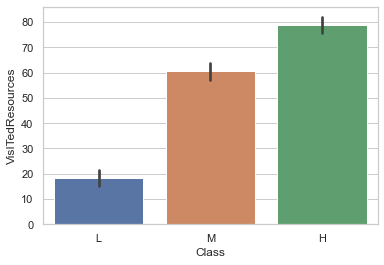

In [28]:
sns.barplot(x='Class', y='VisITedResources', data=df, order=['L','M','H'])

Higher grade students visited Resources more than lower grade once.

### Announcements View

<AxesSubplot:xlabel='Class', ylabel='AnnouncementsView'>

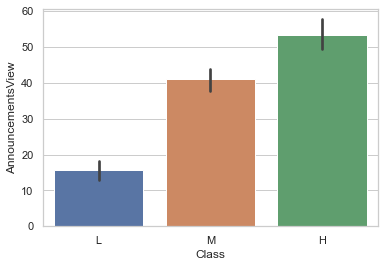

In [29]:
sns.barplot(x='Class', y='AnnouncementsView', data=df, order=['L','M','H'])

### Raise Hands

<AxesSubplot:xlabel='Class', ylabel='raisedhands'>

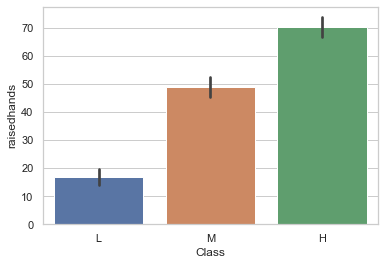

In [30]:
sns.barplot(x='Class', y='raisedhands', data=df, order=['L','M','H'])

### Discussion

<AxesSubplot:xlabel='Class', ylabel='Discussion'>

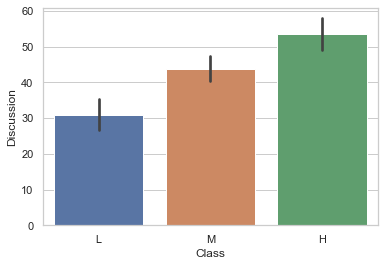

In [31]:
sns.barplot(x='Class', y='Discussion', data=df, order=['L','M','H'])

### Semester & Class

<AxesSubplot:xlabel='Semester', ylabel='count'>

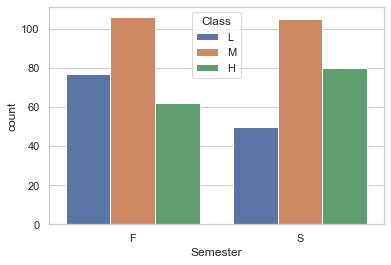

In [32]:
sns.countplot(x='Semester', hue='Class', data=df, hue_order=['L','M','H'])

#### 1. The students who are more actively participating in class have a higher grade.
#### 2. Students studied more in the 2nd semester compared to 1st.

## Q.4 From the above result, what are the factors that leads to get low grades of the students?

<AxesSubplot:xlabel='Class', ylabel='count'>

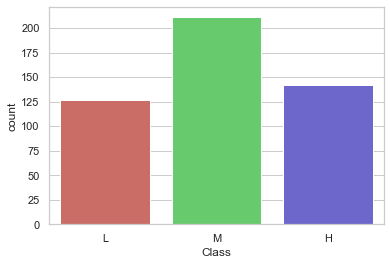

In [33]:
sns.countplot(df.Class, palette='hls', order=['L','M','H'])

In [34]:
df.Class.replace('L',0, inplace=True)
df.Class.replace('M',1, inplace=True)
df.Class.replace('H',2, inplace=True)

<AxesSubplot:xlabel='Class', ylabel='count'>

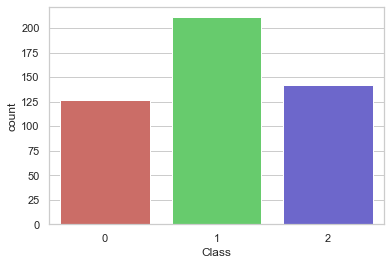

In [35]:
sns.countplot(df.Class, palette='hls')

In [36]:
df.groupby('Class').mean()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
Class,,,,
0,16.889764,18.322835,15.574803,30.834646
1,48.938389,60.635071,40.962085,43.791469
2,70.288732,78.746479,53.380282,53.661972


#### From the above results we can observe that on an average students with low involvements in class have a low grade.

## Q.5 Build classification model and present it's classification report?


### Exploratory Data Analysis

In [37]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [38]:
df.drop(columns=['GradeID','SectionID'], axis=1, inplace=True)

In [39]:
df.drop(columns=['PlaceofBirth'], axis=1, inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   StageID                   480 non-null    object
 3   Topic                     480 non-null    object
 4   Semester                  480 non-null    object
 5   Relation                  480 non-null    object
 6   raisedhands               480 non-null    int64 
 7   VisITedResources          480 non-null    int64 
 8   AnnouncementsView         480 non-null    int64 
 9   Discussion                480 non-null    int64 
 10  ParentAnsweringSurvey     480 non-null    object
 11  ParentschoolSatisfaction  480 non-null    object
 12  StudentAbsenceDays        480 non-null    object
 13  Class                     480 non-null    int64 
dtypes: int64(5), object(9)
mem

### Target Variable

In [41]:
df.Class

0      1
1      1
2      0
3      0
4      1
      ..
475    0
476    1
477    1
478    0
479    0
Name: Class, Length: 480, dtype: int64

In [42]:
df.Class.value_counts()

1    211
2    142
0    127
Name: Class, dtype: int64

### 1. Gender

In [43]:
df.gender

0      M
1      M
2      M
3      M
4      M
      ..
475    F
476    F
477    F
478    F
479    F
Name: gender, Length: 480, dtype: object

In [44]:
df.gender.value_counts()

M    305
F    175
Name: gender, dtype: int64

In [45]:
cross = pd.crosstab(df.gender, df.Class)
cross

Class,0,1,2
gender,,,
F,24,76,75
M,103,135,67


In [46]:
chi2_contingency(cross, correction=False)

(33.326236065889375,
 5.79828805474192e-08,
 2,
 array([[ 46.30208333,  76.92708333,  51.77083333],
        [ 80.69791667, 134.07291667,  90.22916667]]))

In [47]:
df.gender.value_counts()

M    305
F    175
Name: gender, dtype: int64

### 2. NationalITy

In [48]:
df.NationalITy

0          KW
1          KW
2          KW
3          KW
4          KW
        ...  
475    Jordan
476    Jordan
477    Jordan
478    Jordan
479    Jordan
Name: NationalITy, Length: 480, dtype: object

In [49]:
df.NationalITy.value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

In [50]:
mod = ols('Class ~ NationalITy', data=df).fit()
aov_table = sm.stats.anova_lm(mod)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
NationalITy,13.0,34.475099,2.651931,5.279928,7.239098e-09
Residual,466.0,234.056151,0.502266,NaN,NaN


In [51]:
tukey = pairwise_tukeyhsd(df.Class, df.NationalITy, alpha = 0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
      Egypt        Iran  -0.2222    0.9 -1.4816  1.0372  False
      Egypt        Iraq   0.7475  0.303  -0.198   1.693  False
      Egypt      Jordan   0.2041    0.9  -0.613  1.0212  False
      Egypt          KW  -0.0677    0.9  -0.884  0.7486  False
      Egypt       Lybia  -0.8889 0.4972 -2.1483  0.3705  False
      Egypt     Morocco   0.1111    0.9 -1.3248   1.547  False
      Egypt   Palestine   0.5397  0.746 -0.3759  1.4553  False
      Egypt SaudiArabia   0.5657 0.8801 -0.5084  1.6397  False
      Egypt       Syria   0.1111    0.9 -1.0931  1.3153  False
      Egypt       Tunis   0.0278    0.9 -1.0259  1.0815  False
      Egypt         USA   0.4444    0.9  -0.815  1.7038  False
      Egypt     lebanon   0.5229 0.8712 -0.4622  1.5079  False
      Egypt    venzuela   1.1111    0.9 -1.4077  3.6299

In [52]:
df.NationalITy.value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

In [53]:
mod = ols('Class ~ NationalITy', data=df).fit()
aov_table = sm.stats.anova_lm(mod)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
NationalITy,13.0,34.475099,2.651931,5.279928,7.239098e-09
Residual,466.0,234.056151,0.502266,NaN,NaN


In [54]:
tukey = pairwise_tukeyhsd(df.Class, df.NationalITy, alpha = 0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
      Egypt        Iran  -0.2222    0.9 -1.4816  1.0372  False
      Egypt        Iraq   0.7475  0.303  -0.198   1.693  False
      Egypt      Jordan   0.2041    0.9  -0.613  1.0212  False
      Egypt          KW  -0.0677    0.9  -0.884  0.7486  False
      Egypt       Lybia  -0.8889 0.4972 -2.1483  0.3705  False
      Egypt     Morocco   0.1111    0.9 -1.3248   1.547  False
      Egypt   Palestine   0.5397  0.746 -0.3759  1.4553  False
      Egypt SaudiArabia   0.5657 0.8801 -0.5084  1.6397  False
      Egypt       Syria   0.1111    0.9 -1.0931  1.3153  False
      Egypt       Tunis   0.0278    0.9 -1.0259  1.0815  False
      Egypt         USA   0.4444    0.9  -0.815  1.7038  False
      Egypt     lebanon   0.5229 0.8712 -0.4622  1.5079  False
      Egypt    venzuela   1.1111    0.9 -1.4077  3.6299

In [55]:
df.NationalITy.value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

### StageID

In [56]:
df.StageID

0        lowerlevel
1        lowerlevel
2        lowerlevel
3        lowerlevel
4        lowerlevel
           ...     
475    MiddleSchool
476    MiddleSchool
477    MiddleSchool
478    MiddleSchool
479    MiddleSchool
Name: StageID, Length: 480, dtype: object

In [57]:
df.StageID.value_counts()

MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64

In [58]:
mod = ols('Class ~ StageID', data=df).fit()
aov_table = sm.stats.anova_lm(mod)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
StageID,2.0,2.258103,1.129051,2.022575,0.133447
Residual,477.0,266.273147,0.558225,NaN,NaN


In [59]:
df.drop(columns=['StageID'], axis=1, inplace=True)

### Topic

In [60]:
df.Topic

0             IT
1             IT
2             IT
3             IT
4             IT
         ...    
475    Chemistry
476      Geology
477      Geology
478      History
479      History
Name: Topic, Length: 480, dtype: object

In [61]:
df.Topic.value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

In [62]:
mod = ols('Class ~ Topic', data=df).fit()
aov_table = sm.stats.anova_lm(mod)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Topic,11.0,14.317128,1.301557,2.396125,0.006746
Residual,468.0,254.214122,0.543193,NaN,NaN


In [63]:
tukey = pairwise_tukeyhsd(df.Class, df.Topic, alpha = 0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
   Arabic   Biology   0.3661 0.5338 -0.1768   0.909  False
   Arabic Chemistry   0.0494    0.9 -0.5367  0.6356  False
   Arabic   English   0.1217    0.9 -0.3575  0.6008  False
   Arabic    French   0.0276    0.9 -0.4077   0.463  False
   Arabic   Geology   0.2161    0.9   -0.37  0.8022  False
   Arabic   History   0.0187    0.9 -0.6199  0.6573  False
   Arabic        IT   -0.276 0.5064 -0.6773  0.1253  False
   Arabic      Math  -0.0815    0.9 -0.6967  0.5337  False
   Arabic     Quran    0.057    0.9 -0.5478  0.6618  False
   Arabic   Science   0.0837    0.9 -0.3791  0.5466  False
   Arabic   Spanish  -0.1539    0.9 -0.7316  0.4238  False
  Biology Chemistry  -0.3167    0.9 -0.9797  0.3463  False
  Biology   English  -0.2444    0.9 -0.8151  0.3262  False
  Biology    French  -0.3385 0.6178 -0.8728  0.1959  Fal

In [64]:
df.Topic.value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

In [65]:
df.Topic.value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

### Semester

In [66]:
df.Semester

0      F
1      F
2      F
3      F
4      F
      ..
475    S
476    F
477    S
478    F
479    S
Name: Semester, Length: 480, dtype: object

In [67]:
df.Semester.value_counts()

F    245
S    235
Name: Semester, dtype: int64

In [68]:
df.Semester.value_counts()

F    245
S    235
Name: Semester, dtype: int64

In [69]:
cross = pd.crosstab(df.Semester, df.Class)
cross

Class,0,1,2
Semester,,,
F,77,106,62
S,50,105,80


In [70]:
chi2_contingency(cross, correction=False)

(7.821648437009264,
 0.02002399011511543,
 2,
 array([[ 64.82291667, 107.69791667,  72.47916667],
        [ 62.17708333, 103.30208333,  69.52083333]]))

### Relation

In [71]:
df.Relation

0      Father
1      Father
2      Father
3      Father
4      Father
        ...  
475    Father
476    Father
477    Father
478    Father
479    Father
Name: Relation, Length: 480, dtype: object

In [72]:
df.Relation.value_counts()

Father    283
Mum       197
Name: Relation, dtype: int64

In [73]:
df.Relation.value_counts()

Father    283
Mum       197
Name: Relation, dtype: int64

In [74]:
cross = pd.crosstab(df.Relation, df.Class)
cross

Class,0,1,2
Relation,,,
Father,104,137,42
Mum,23,74,100


In [75]:
chi2_contingency(cross, correction=False)

(81.36554176950568,
 2.146332966851339e-18,
 2,
 array([[ 74.87708333, 124.40208333,  83.72083333],
        [ 52.12291667,  86.59791667,  58.27916667]]))

### raisedhands

In [76]:
df.raisedhands

0      15
1      20
2      10
3      30
4      40
       ..
475     5
476    50
477    55
478    30
479    35
Name: raisedhands, Length: 480, dtype: int64

In [77]:
df.raisedhands.value_counts()

10    31
70    31
80    28
72    17
50    17
      ..
61     1
83     1
52     1
67     1
97     1
Name: raisedhands, Length: 82, dtype: int64

In [78]:
corr,_ = pearsonr(df.raisedhands,df.Class)
print('Pearsons correlation: %.3f' %corr)

Pearsons correlation: 0.646


### Parentsansweringsurvey

In [79]:
df.ParentAnsweringSurvey

0      Yes
1      Yes
2       No
3       No
4       No
      ... 
475     No
476     No
477     No
478     No
479     No
Name: ParentAnsweringSurvey, Length: 480, dtype: object

In [80]:
df.ParentAnsweringSurvey.value_counts()

Yes    270
No     210
Name: ParentAnsweringSurvey, dtype: int64

In [81]:
df.ParentAnsweringSurvey.value_counts()

Yes    270
No     210
Name: ParentAnsweringSurvey, dtype: int64

In [82]:
cross = pd.crosstab(df.ParentAnsweringSurvey, df.Class)
cross

Class,0,1,2
ParentAnsweringSurvey,,,
No,99,83,28
Yes,28,128,114


In [83]:
chi2_contingency(cross, correction=False)

(95.36464947421923,
 1.9580757205685668e-21,
 2,
 array([[ 55.5625,  92.3125,  62.125 ],
        [ 71.4375, 118.6875,  79.875 ]]))

### ParentschoolSatisfaction

In [84]:
df.ParentschoolSatisfaction

0      Good
1      Good
2       Bad
3       Bad
4       Bad
       ... 
475     Bad
476     Bad
477     Bad
478     Bad
479     Bad
Name: ParentschoolSatisfaction, Length: 480, dtype: object

In [85]:
df.ParentschoolSatisfaction.value_counts()

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64

In [86]:
df.ParentschoolSatisfaction.value_counts()

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64

In [87]:
cross = pd.crosstab(df.ParentschoolSatisfaction, df.Class)
cross

Class,0,1,2
ParentschoolSatisfaction,,,
Bad,84,80,24
Good,43,131,118


In [88]:
chi2_contingency(cross, correction=False)

(68.4695169021438,
 1.3552933750373137e-15,
 2,
 array([[ 49.74166667,  82.64166667,  55.61666667],
        [ 77.25833333, 128.35833333,  86.38333333]]))

### StudentAbsenceDays

In [89]:
df.StudentAbsenceDays

0      Under-7
1      Under-7
2      Above-7
3      Above-7
4      Above-7
        ...   
475    Above-7
476    Under-7
477    Under-7
478    Above-7
479    Above-7
Name: StudentAbsenceDays, Length: 480, dtype: object

In [90]:
df.StudentAbsenceDays.value_counts()

Under-7    289
Above-7    191
Name: StudentAbsenceDays, dtype: int64

In [91]:
df.StudentAbsenceDays.value_counts()

Under-7    289
Above-7    191
Name: StudentAbsenceDays, dtype: int64

In [92]:
cross = pd.crosstab(df.StudentAbsenceDays, df.Class)
cross

Class,0,1,2
StudentAbsenceDays,,,
Above-7,116,71,4
Under-7,11,140,138


In [93]:
chi2_contingency(cross, correction=False)

(225.20481950881492,
 1.2513960927832126e-49,
 2,
 array([[ 50.53541667,  83.96041667,  56.50416667],
        [ 76.46458333, 127.03958333,  85.49583333]]))

# Model Building

In [94]:
df.head()

,gender,NationalITy,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,IT,F,Father,15,16,2,20,Yes,Good,Under-7,1
1,M,KW,IT,F,Father,20,20,3,25,Yes,Good,Under-7,1
2,M,KW,IT,F,Father,10,7,0,30,No,Bad,Above-7,0
3,M,KW,IT,F,Father,30,25,5,35,No,Bad,Above-7,0
4,M,KW,IT,F,Father,40,50,12,50,No,Bad,Above-7,1


In [95]:
df.drop(columns=['NationalITy','Relation'], axis=1,inplace=True)

In [96]:
data_with_dummies = pd.get_dummies(df, drop_first=True)

In [97]:
data_with_dummies.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_M,Topic_Biology,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,15,16,2,20,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1
1,20,20,3,25,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1
2,10,7,0,30,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,30,25,5,35,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,40,50,12,50,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [98]:
data_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   raisedhands                    480 non-null    int64
 1   VisITedResources               480 non-null    int64
 2   AnnouncementsView              480 non-null    int64
 3   Discussion                     480 non-null    int64
 4   Class                          480 non-null    int64
 5   gender_M                       480 non-null    uint8
 6   Topic_Biology                  480 non-null    uint8
 7   Topic_Chemistry                480 non-null    uint8
 8   Topic_English                  480 non-null    uint8
 9   Topic_French                   480 non-null    uint8
 10  Topic_Geology                  480 non-null    uint8
 11  Topic_History                  480 non-null    uint8
 12  Topic_IT                       480 non-null    uint8
 13  Topic_Math          

In [100]:
Features = data_with_dummies.drop(['Class'],axis = 1)
Target = data_with_dummies['Class']

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Features)


StandardScaler()

In [102]:
X = scaler.fit_transform(Features)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, Target, test_size=0.3, random_state=45)

In [104]:
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)

LogisticRegression()

In [105]:
from sklearn.metrics import classification_report, accuracy_score

Prediction = Logit_Model.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)

In [106]:
print('Accuracy Of Model: ', Score)

Accuracy Of Model:  0.7291666666666666


In [107]:
print(Report)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        30
           1       0.75      0.70      0.73        74
           2       0.62      0.65      0.63        40

    accuracy                           0.73       144
   macro avg       0.73      0.75      0.74       144
weighted avg       0.73      0.73      0.73       144



# Model 2 : Using Newton-CG Solver.

In [108]:
Logit_Model = LogisticRegression(solver = 'newton-cg', random_state=0)
Logit_Model.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='newton-cg')

In [109]:
Prediction = Logit_Model.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)

In [110]:
print('Accuracy Of Model: ', Score)

Accuracy Of Model:  0.7291666666666666


In [111]:
print(Report)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        30
           1       0.75      0.70      0.73        74
           2       0.62      0.65      0.63        40

    accuracy                           0.73       144
   macro avg       0.73      0.75      0.74       144
weighted avg       0.73      0.73      0.73       144



# Model 3 : Using Saag Solver

In [112]:
Logit_Model = LogisticRegression(solver = 'sag', random_state=0)
Logit_Model.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='sag')

In [113]:
Prediction = Logit_Model.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)

In [114]:
print('Accuracy Of Model: ', Score)

Accuracy Of Model:  0.7291666666666666


In [115]:
print(Report)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        30
           1       0.75      0.70      0.73        74
           2       0.62      0.65      0.63        40

    accuracy                           0.73       144
   macro avg       0.73      0.75      0.74       144
weighted avg       0.73      0.73      0.73       144



## Model 5

In [117]:
df.drop(columns=['Topic'], axis=1,inplace=True)

In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Features)


StandardScaler()

In [119]:
X = scaler.fit_transform(Features)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, Target, test_size=0.3, random_state=0)


In [122]:
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)

LogisticRegression()

In [123]:
from sklearn.metrics import classification_report, accuracy_score

Prediction = Logit_Model.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)

In [124]:
print('Accuracy Of Model: ', Score)

Accuracy Of Model:  0.7847222222222222


In [125]:
print(Report)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        34
           1       0.79      0.77      0.78        71
           2       0.72      0.67      0.69        39

    accuracy                           0.78       144
   macro avg       0.78      0.79      0.79       144
weighted avg       0.78      0.78      0.78       144

